In [10]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet("../CACHE_DIR/us_month_ret.pq")
df.columns

Index(['Date', 'StockID', 'MarketCap', 'log_ret', 'Ret_5d', 'Ret_20d',
       'Ret_60d', 'Ret_6-20d', 'Ret_6-60d', 'month_ret', 'next_month_ret',
       'next_month_ret_0delay'],
      dtype='object')

In [4]:
df = pd.read_feather("WORK_SPACE/data/processed_data/us_ret.feather")

print(df.columns)
# Display the first few rows
print(df.head())

# unique_dates is already sorted and deduplicated
start_date = pd.Timestamp('1992-01-03')
start_idx  = unique_dates[unique_dates == start_date].index[0]

# every 5th trading day from that anchor
weekly_dates = unique_dates.iloc[start_idx::5]


print(weekly_dates)
len(weekly_dates)

Index(['Date', 'StockID', 'EXCHCD', 'Low', 'High', 'Close', 'Vol', 'Ret',
       'Shares', 'Open', 'AdjClose'],
      dtype='object')
        Date StockID  EXCHCD       Low       High      Close       Vol  \
0 1992-01-02   10001     3.0  1.569100   1.569100   1.569100     100.0   
1 1992-01-02   10002     3.0  2.213036   2.615406   2.414221       NaN   
2 1992-01-02   10003     3.0  1.187509   1.500011   1.343760       NaN   
3 1992-01-02   10009     3.0  3.066491   3.363248   3.214870       NaN   
4 1992-01-02   10010     3.0  9.851861  10.496376  10.312229  236059.0   

        Ret  Shares  Open   AdjClose  
0  0.000000  1075.0   NaN   1.569100  
1  0.000000  1175.0   NaN   2.414221  
2  0.131579  2194.0   NaN   1.343760  
3  0.015625  1158.0   NaN   3.214870  
4 -0.008850  7567.0   NaN  10.312229  


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import pandas as pd

# ---------- load ----------
spy_periods = pd.read_csv("CACHE_DIR/spy_week_ret.csv")
raw_df  = pd.read_feather("WORK_SPACE/data/processed_data/us_ret.feather")

# ---------- prep: unique, sorted, normalized ----------
week_uniq = pd.to_datetime(week_df['Date']).drop_duplicates().sort_values().dt.normalize()
raw_uniq  = pd.to_datetime(raw_df['Date']).drop_duplicates().sort_values().dt.normalize()

# ---------- common anchor ----------
anchor = pd.Timestamp('1992-01-03')

def anchored_every_5(series, anchor):
    """Return dates from `series` starting at `anchor`, then every 5th observation."""
    if anchor not in series.values:
        raise ValueError(f"{anchor.date()} not found in provided date series")
    start_idx = series[series == anchor].index[0]
    return series.iloc[start_idx::5]

week_5d = week_uniq.reset_index(drop=True)
raw_5d  = anchored_every_5(raw_uniq.reset_index(drop=True),  anchor)

# ---------- quick comparison ----------
same_sets = week_5d.equals(raw_5d)
print(f"Same anchored‐every-5th dates?  {same_sets}")
print(f"#dates in week file : {len(week_5d)}")
print(f"#dates in raw  file : {len(raw_5d)}")

if not same_sets:
    extra_in_week = pd.Series(list(set(week_5d) - set(raw_5d))).sort_values()
    extra_in_raw  = pd.Series(list(set(raw_5d)  - set(week_5d))).sort_values()

    print("\n⚠️ In week file but not raw (first 10):")
    print(extra_in_week.head(10).to_string(index=False))

    print("\n⚠️ In raw file but not week (first 10):")
    print(extra_in_raw.head(10).to_string(index=False))

Same anchored‐every-5th dates?  False
#dates in week file : 6012
#dates in raw  file : 1440

⚠️ In week file but not raw (first 10):
1992-01-07
1992-01-08
1992-01-09
1992-01-13
1992-01-14
1992-01-15
1992-01-16
1992-01-20
1992-01-21
1992-01-22

⚠️ In raw file but not week (first 10):
1992-03-02
1992-04-13
1992-05-05
1992-05-12
1992-07-30
1992-08-06
1992-11-30
1992-12-21
1993-01-20
1993-06-07


In [6]:
week_5d

0      1992-01-03
1      1992-01-07
2      1992-01-08
3      1992-01-09
4      1992-01-10
          ...    
6007   2020-07-27
6008   2020-07-28
6009   2020-07-29
6010   2020-07-30
6011   2020-07-31
Name: Date, Length: 6012, dtype: datetime64[us]

In [7]:
raw_5d

1      1992-01-03
6      1992-01-10
11     1992-01-17
16     1992-01-24
21     1992-01-31
          ...    
7176   2020-06-29
7181   2020-07-07
7186   2020-07-14
7191   2020-07-21
7196   2020-07-28
Name: Date, Length: 1440, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import os
os.chdir('/Users/ronaldliu/Downloads/jiang_2023/Scripts_2')
# Read the CSV file
df = pd.read_csv("../WORK_SPACE/data/stocks_dataset/raw_data/us_920101-200731.csv", compression='gzip')

# Display the first 5 rows
print(df.head())

0          1992-01-02
6794       1992-01-03
13590      1992-01-06
20383      1992-01-07
27178      1992-01-08
              ...    
53104325   2020-07-27
53111957   2020-07-28
53119586   2020-07-29
53127216   2020-07-30
53134846   2020-07-31
Name: Date, Length: 7200, dtype: datetime64[ns]


In [4]:
df.head(20)

,PERMNO,date,EXCHCD,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC
0,10001,1992-01-02,3.0,14.50,14.500,14.500,100.0,0.000000,1075.0,NaN
1,10001,1992-01-03,3.0,14.50,14.500,14.500,498.0,0.000000,1075.0,NaN
2,10001,1992-01-06,3.0,14.50,14.500,14.500,100.0,0.000000,1075.0,NaN
3,10001,1992-01-07,3.0,14.50,15.250,14.500,417.0,0.000000,1075.0,NaN
4,10001,1992-01-08,3.0,14.50,15.125,15.125,500.0,0.043103,1075.0,NaN
5,10001,1992-01-09,3.0,14.50,14.500,14.500,1200.0,-0.041322,1075.0,NaN
6,10001,1992-01-10,3.0,14.50,14.500,14.500,150.0,0.000000,1075.0,NaN
7,10001,1992-01-13,3.0,14.50,14.500,14.500,1200.0,0.000000,1075.0,NaN
8,10001,1992-01-14,3.0,14.50,14.500,14.500,800.0,0.000000,1075.0,NaN
9,10001,1992-01-15,3.0,14.50,15.250,15.000,1200.0,0.034483,1075.0,NaN


In [6]:
import pandas as pd

# Load the Feather file
df = pd.read_feather("../WORK_SPACE/data/processed_data/us_ret.feather")

print(df.columns)
# Display the first few rows
print(df.head())

Index(['Date', 'StockID', 'EXCHCD', 'Low', 'High', 'Close', 'Vol', 'Ret',
       'Shares', 'Open', 'MarketCap', 'log_ret', 'cum_log_ret', 'EWMA_vol',
       'Ret_week', 'Ret_month', 'Ret_quarter', 'Ret_5d', 'Ret_20d', 'Ret_60d',
       'Ret_65d', 'Ret_180d', 'Ret_250d', 'Ret_260d'],
      dtype='object')
        Date StockID  EXCHCD      Low   High     Close       Vol       Ret  \
0 1992-01-02   10001     3.0  14.5000  14.50  14.50000     100.0  0.000000   
1 1992-01-02   10002     3.0   5.5000   6.50   6.00000       NaN  0.000000   
2 1992-01-02   10003     3.0   1.1875   1.50   1.34375       NaN  0.131579   
3 1992-01-02   10009     3.0   7.7500   8.50   8.12500       NaN  0.015625   
4 1992-01-02   10010     3.0  13.3750  14.25  14.00000  236059.0 -0.008850   

   Shares  Open  ...  Ret_week  Ret_month  Ret_quarter        Ret_5d  \
0  1075.0   NaN  ...       NaN        NaN          NaN -1.021660e-07   
1  1175.0   NaN  ...       NaN        NaN          NaN  0.000000e+00   
2  2194.0

In [ ]:
import pandas as pd

# Load the Feather file
df = pd.read_feather("../WORK_SPACE/data/processed_data/cn_ret.feather")

print(df.columns)
# Display the first few rows
print(df.head())
print

Index(['Date', 'StockID', 'Open', 'High', 'Low', 'Close', 'Vol', 'Ret',
       'EXCHCD', 'Shares'],
      dtype='object')
        Date StockID   Open   High    Low  Close     Vol       Ret  EXCHCD  \
0 1990-12-19  600601  185.3  185.3  185.3  185.3   200.0  2.706000     1.0   
1 1990-12-19  600602  365.7  384.0  365.7  384.0  1160.0  2.840000     1.0   
2 1990-12-19  600651  320.3  320.3  320.3  320.3     2.0  3.575714     1.0   
3 1990-12-19  600656  260.0  260.0  260.0  260.0    50.0  1.600000     1.0   
4 1990-12-20  600601  185.3  194.6  185.3  194.6    84.0  0.050189     1.0   

   Shares  
0  910.00  
1  491.00  
2   33.00  
3  450.11  
4  910.00  


In [2]:
import pandas as pd
import os
os.chdir('/Users/ronaldliu/Downloads/jiang_2023/Scripts_2')

In [3]:
from Data import equity_data as eqd

period_end_dates = eqd.get_period_end_dates(period="week")
len(period_end_dates)

1278

Mon       1
Tue       1
Thu      45
Fri    1231
Name: count, dtype: int64


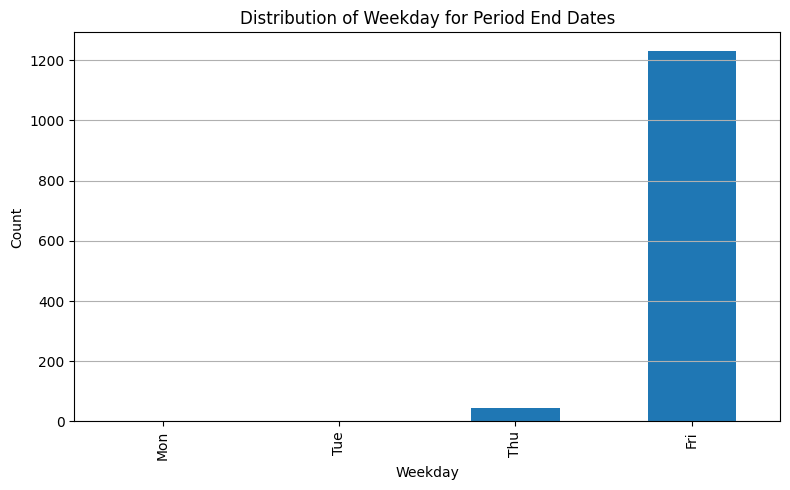

First 5 period end dates:
DatetimeIndex(['1993-01-29', '1993-02-05', '1993-02-19', '1993-02-26',
               '1993-03-05'],
              dtype='datetime64[ns]', name='Date', freq=None)
Last 5 period end dates:
DatetimeIndex(['2019-12-06', '2019-12-13', '2019-12-20', '2019-12-27',
               '2019-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from Data import equity_data as eqd

# Load dates
dates = pd.to_datetime(eqd.get_period_end_dates("week"))

# Count occurrences of each weekday (0=Mon, 6=Sun)
weekday_counts = pd.Series(dates.weekday).value_counts().sort_index()

# Label weekdays
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts.index = [weekday_labels[i] for i in weekday_counts.index]

# Display result
print(weekday_counts)

# Plot
plt.figure(figsize=(8, 5))
weekday_counts.plot(kind='bar')
plt.title("Distribution of Weekday for Period End Dates")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


print("First 5 period end dates:")
print(dates.sort_values()[:5])
print("Last 5 period end dates:")
print(dates.sort_values()[-5:])

In [ ]:
ret = eqd.get_period_end_dates()

NameError: name 'eqd' is not defined

In [27]:
import pandas as pd

# Load data
df = pd.read_feather("../WORK_SPACE/data/processed_data/us_ret.feather")
df['Date'] = pd.to_datetime(df['Date'])

# Assign week period
df['Week'] = df['Date'].dt.to_period('W')

# Get the latest trading day for each week
weekly_max_date = df.groupby('Week')['Date'].max()

# Convert to weekday (0=Mon, ..., 6=Sun)
weekday_counts = weekly_max_date.dt.weekday.value_counts().sort_index()

# Label weekdays
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts.index = [weekday_labels[i] for i in weekday_counts.index]

# Display result
print(weekday_counts)

print(weekly_max_date.head())
weekly_max_date.tail()

Mon       1
Thu      51
Fri    1440
Name: count, dtype: int64
Week
1991-12-30/1992-01-05   1992-01-03
1992-01-06/1992-01-12   1992-01-10
1992-01-13/1992-01-19   1992-01-17
1992-01-20/1992-01-26   1992-01-24
1992-01-27/1992-02-02   1992-01-31
Freq: W-SUN, Name: Date, dtype: datetime64[ns]


Week
2020-06-29/2020-07-05   2020-07-02
2020-07-06/2020-07-12   2020-07-10
2020-07-13/2020-07-19   2020-07-17
2020-07-20/2020-07-26   2020-07-24
2020-07-27/2020-08-02   2020-07-31
Freq: W-SUN, Name: Date, dtype: datetime64[ns]

In [8]:
import pandas as pd
import os
os.chdir('/Users/ronaldliu/Downloads/jiang_2023/Scripts_2')

from Data import equity_data as eqd
us_data = eqd.processed_US_data()

# Number of chunks
n_chunks = 100
chunk_size = len(us_data) // n_chunks

# Middle chunk index
mid_chunk = n_chunks // 2

# Get start and end indices for middle chunk
start_idx = mid_chunk * chunk_size
end_idx = start_idx + chunk_size

# Extract middle slice
middle_slice = us_data.iloc[start_idx:end_idx]

# Save to CSV
middle_slice.to_csv("us_data_middle_chunk.csv")

Loading processed data from ../WORK_SPACE/data/processed_data/us_ret.feather
Finish loading processed data in 0.20 min


In [49]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet("CACHE_DIR/CN_week_ret.pq")
# keep rows whose Date falls in calendar year 2000
df_2000_10001 = df[(df["Date"].dt.year == 2000)]
df_2000_10001.head(10)


,Date,StockID,MarketCap,log_ret,Ret_5d,Ret_20d,Ret_60d,Ret_6-20d,Ret_6-60d,week_ret,next_week_ret,next_week_ret_0delay
432,2000-01-07,000001,1.022335e+06,0.039672,-0.084954,-0.057832,-0.002559,-0.017923,-0.072344,-0.084954,0.004474,0.004474
433,2000-01-14,000001,9.354840e+05,-0.014437,0.004474,0.011744,0.052013,-0.032614,-0.069643,0.004474,0.031736,0.031736
434,2000-01-21,000001,9.396696e+05,0.008387,0.031736,0.034522,0.060690,0.096338,0.069290,0.031736,-0.006477,-0.006477
435,2000-01-28,000001,9.694921e+05,0.035149,-0.006477,0.027524,-0.027521,-0.006830,0.049387,-0.006477,-0.017381,-0.017381
436,2000-02-18,000001,9.632136e+05,-0.020963,-0.017381,-0.013035,-0.027157,0.021463,0.036291,-0.017381,0.027088,0.027088
437,2000-02-25,000001,9.464712e+05,-0.004962,0.027088,0.022665,0.012716,-0.014053,-0.004368,0.027088,0.024758,0.024758
438,2000-03-03,000001,9.721081e+05,0.011912,0.024758,-0.011303,-0.020451,0.041372,0.051098,0.024758,-0.045694,-0.045694
439,2000-03-10,000001,9.961753e+05,-0.052684,-0.045694,-0.007354,-0.036240,-0.035978,-0.007085,-0.045694,0.018162,0.018162
440,2000-03-17,000001,9.506568e+05,0.013855,0.018162,0.072647,0.017611,-0.035916,0.016226,0.018162,-0.007026,-0.007026
441,2000-03-24,000001,9.679225e+05,-0.005929,-0.007026,0.016757,-0.016216,-0.028176,0.004397,-0.007026,0.028850,0.028850


In [43]:
np.exp(0.015268)

NameError: name 'np' is not defined

In [48]:
# Read the Parquet file
df = pd.read_parquet("CACHE_DIR/us_week_ret_5.pq")
df_2000_10001 = df[(df["Date"].dt.year == 2000)]
df_2000_10001.head(10)

,Date,StockID,MarketCap,log_ret,Ret_5d,Ret_20d,Ret_60d,Ret_6-20d,Ret_6-60d,week_ret,next_week_ret,next_week_ret_0delay
332,2000-01-07,10001,20671.8750,-0.007380,-7.407485e-03,-0.037038,-0.022130,0.030770,0.015055,-3.703699e-02,3.076865e-02,3.076865e-02
333,2000-01-21,10001,19906.2500,0.015504,3.076865e-02,-0.000003,0.015481,0.000002,-0.015246,3.076865e-02,-2.985133e-02,-2.985133e-02
334,2000-01-28,10001,20518.7500,0.045810,-2.985133e-02,-0.022391,-0.045144,-0.007632,0.016015,-2.985133e-02,1.538424e-02,1.538424e-02
335,2000-02-04,10001,19906.2500,-0.015268,1.538424e-02,-0.000002,0.015483,0.000001,-0.015247,1.538424e-02,-1.136488e-02,-1.136488e-02
336,2000-02-11,10001,20212.5000,0.015268,-1.515260e-02,-0.053032,-0.015289,0.040001,0.000138,-1.136488e-02,-3.831915e-03,-3.831915e-03
337,2000-02-25,10001,19982.8125,0.003839,-3.831915e-03,-0.003970,0.003813,0.000139,-0.007616,-3.831915e-03,-2.307688e-02,-2.307688e-02
338,2000-03-03,10001,19906.2500,-0.015268,-2.307688e-02,-0.000139,-0.011854,-0.038328,-0.026927,-2.307688e-02,5.546337e-02,5.546337e-02
339,2000-03-10,10001,19446.8750,0.040166,5.546337e-02,0.039471,0.011488,-0.046154,-0.019765,5.546337e-02,-3.030278e-02,-3.030278e-02
340,2000-03-17,10001,20212.5000,0.062520,-3.030278e-02,-0.045454,-0.022726,0.015872,-0.007753,-3.030278e-02,-1.562500e-08,-1.562500e-08
341,2000-03-24,10001,19600.0000,0.015748,-1.562500e-08,0.015626,-0.032039,-0.015385,0.033099,-1.562500e-08,1.562460e-02,1.562460e-02


In [1]:
import pandas as pd
import os
os.chdir('/Users/ronaldliu/Downloads/jiang_2023/Scripts_2')

from Data import equity_data as eqd
pd_ret = eqd.get_period_ret("week", "CN")
print(pd_ret)

                       MarketCap   log_ret    Ret_5d   Ret_20d   Ret_60d  \
Date       StockID                                                         
1990-12-21 600601   1.859130e+05  0.048643  0.181107  0.232012  0.145376   
           600602   2.078894e+05  0.048884  0.181154  0.235476  0.102506   
           600651   1.109790e+04  0.048745  0.181386  0.229559  0.085639   
           600654   7.133700e+03  5.828063  0.136002  0.170737  0.217548   
           600656   1.237802e+05  0.007299  0.133092  0.221457  0.638182   
...                          ...       ...       ...       ...       ...   
2025-05-23 920445   6.508197e+05 -0.010040  0.023209       NaN       NaN   
           920489   1.174791e+06  0.044064 -0.022367       NaN       NaN   
           920682   7.156645e+05 -0.004061  0.033571       NaN       NaN   
           920799   2.096104e+06 -0.023790  0.054618       NaN       NaN   
           920819   4.481523e+06 -0.014118  0.042654       NaN       NaN   

           